Finance with Python

# Imports

!pip install mplfinance

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

## Function that Saves Stock Data to CSV

In [2]:
def save_to_csv_from_yahoo(ticker, syear,smonth,sday,eyear,emonth,eday):
    start = dt.datetime(syear, smonth,sday)
    end = dt.datetime(eyear, emonth,eday)
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    df.to_csv('/Users/vanessalieberg/code/Megeve2022/Finance_python/data_stocks/'+ticker+'.csv')
    
    return df
    

    

## Function that Return a Dataframe from CSV

In [3]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv('/Users/vanessalieberg/code/Megeve2022/Finance_python/data_stocks/'+ticker+'.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df

# Add Daily Return to Dataframe

We calculate a percentage rate of return for each day to compare investments.

Simple Rate Return = (End Price - Beginning Price) / Beginning Price OR (EP/BP) - 1

In [4]:
def add_daily_return_to_df(df,ticker):
    df['daily_return'] = (df['Adj Close']/df['Adj Close'].shift(1)) -1
    df.to_csv('/Users/vanessalieberg/code/Megeve2022/Finance_python/data_stocks/'+ticker+'.csv')
    return df

# Returns Total Return over Time

In [5]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date']>=start) & (df['Date']<= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return (days*daily_ret)

# Matplotlib Finance

In [6]:
def mplfinance_plot(ticker, chart_type, syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df = pd.read_csv('/Users/vanessalieberg/code/Megeve2022/Finance_python/data_stocks/'+ticker+'.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        #mpf.plot(df_sub, type = 'candle')
        #mpf.plot(df_sub, type = 'line')
        mpf.plot(df_sub, type = 'ohlc', mav = 4) # 4 last observations
        
        s = mpf.make_mpf_style(base_mpf_style = 'charles', rc={'font.size':8})
        fig = mpf.figure(figsize=(12,8), style = s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2,sharex = ax)
        mpf.plot(df_sub, type = chart_type, mav = (3,5,7), ax = ax, volume = av , show_nontrading = True)
    
    

# Simple Price Plot

In [7]:
def price_plot(ticker, syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df = pd.read_csv('/Users/vanessalieberg/code/Megeve2022/Finance_python/data_stocks/'+ticker+'.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        df_np = df_sub.to_numpy()
        np_adj_close = df_np[:,5]
        date_arr = df_np[:,1]
        fig = plt.figure(figsize = (12,8), dpi = 100)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(date_arr, np_adj_close, color = 'navy')
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True, color = '0.6', dashes = (5, 2, 1, 2))
        axes.set_facecolor('#FAEBD7')
        
        
        

# Download Multiple stocks

In [8]:
def download_multiple_stocks(syear,smonth,sday,eyear,emonth,eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x,syear,smonth,sday,eyear,emonth,eday) # x = ticker

# Merge Multiple Stocks in One Dataframe by Column Name

In [9]:
def merge_df_by_column_name(col_name, syear,smonth,sday,eyear,emonth,eday, *tickers):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
    return mult_df
    

# Get changing Value of Investment using Multiple Stocks

In [10]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize=(15,6))

# Get Standard Deviation for Multiple Stocks

Risk is a measure of the variability of return. Variance and Standard Deviation allow us to quantify risk.

Variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set. It equals the sum of the squares of the difference between each data point and the mean divided by the number of data points minus 1.

s^2 = Soma(x-x^)^2 / N-1

Standard deviation is a measure of the amount of variation within a set of values. A low standard deviation indicated that the values tend to be close to the mean. A high standard deviation means values are more spread out. To get the Standard Deviation find the square root of the variance.

rootsquare(s^2)

In [11]:
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [12]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard Deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [13]:
# Less covariance is the less risk stock

# Test Functions

In [14]:
# Variables:

ticker = 'AMZN'
chart_type = 'ohlc'
syear = 2020
smonth = 1
sday = 1
eyear = 2022
emonth = 4
eday =1
col_name = 'Adj Close'
investiment = 1

tickers = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

## Analysis of stock pick

In [15]:
save_to_csv_from_yahoo(ticker, syear,smonth,sday,eyear,emonth,eday)

stock_pick = get_df_from_csv(ticker)

add_daily_return_to_df(stock_pick,ticker)

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,NaN
1,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-0.012139
2,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,0.014886
3,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,0.002092
4,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,-0.007809
...,...,...,...,...,...,...,...,...
564,2022-03-29,3416.629883,3357.370117,3407.679932,3386.300049,3307700,3386.300049,0.001920
565,2022-03-30,3379.010010,3310.000000,3370.189941,3326.020020,2808400,3326.020020,-0.017801
566,2022-03-31,3329.899902,3259.070068,3328.899902,3259.949951,2998300,3259.949951,-0.019865
567,2022-04-01,3316.540039,3246.389893,3282.989990,3271.199951,2851800,3271.199951,0.003451


In [16]:
tot_ret = get_return_defined_time(stock_pick, syear,smonth,sday,eyear,emonth,eday)
print("Total Return: ", tot_ret)

Total Return:  0.6770788271412652


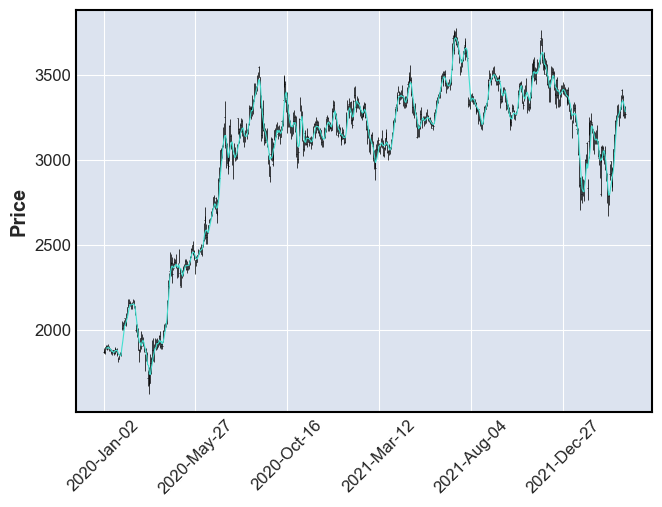

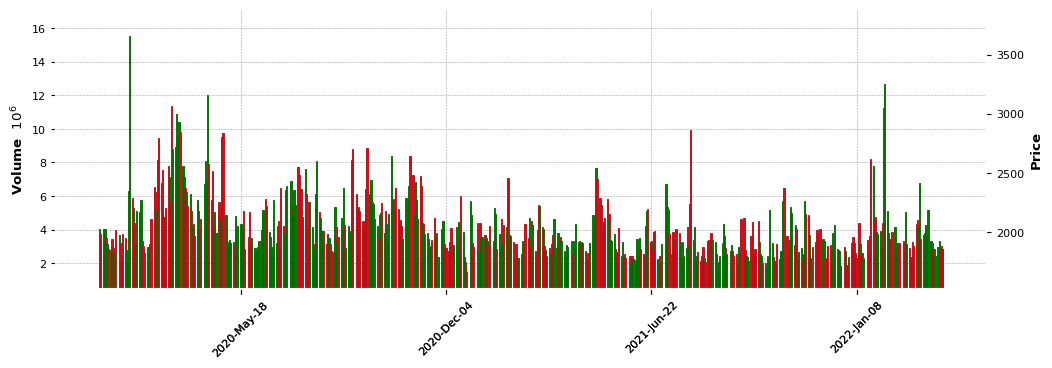

In [17]:
mplfinance_plot(ticker, chart_type, syear,smonth,sday,eyear,emonth,eday)

In [18]:
#price_plot(ticker, syear,smonth,sday,eyear,emonth,eday)

## Analysis of 5 stocks

In [19]:
download_multiple_stocks(syear,smonth,sday,eyear,emonth,eday, *tickers)

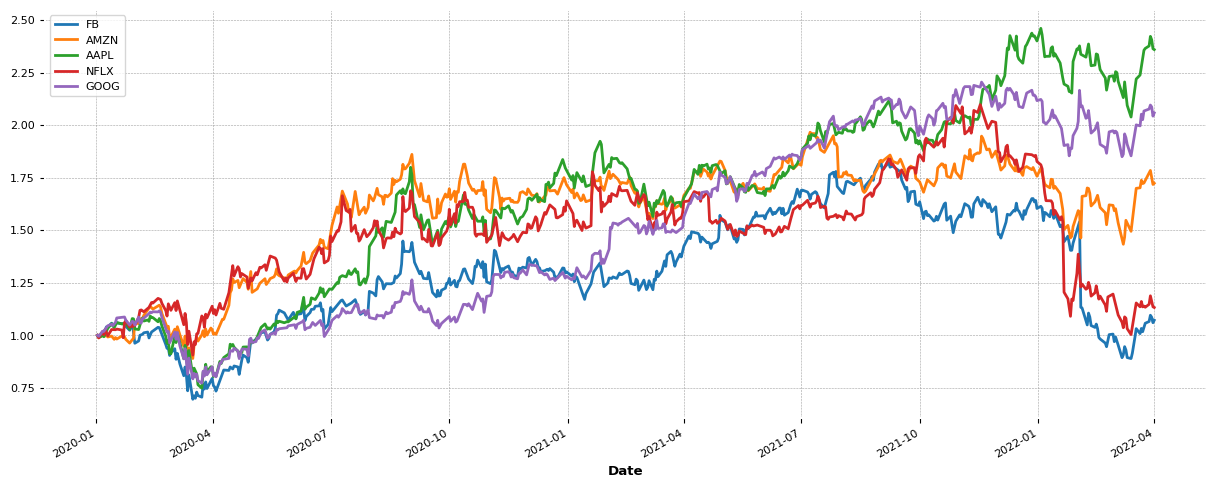

In [20]:
mult_df = merge_df_by_column_name(col_name, syear,smonth,sday,eyear,emonth,eday, *tickers)

plot_return_mult_stocks(investiment, mult_df)


In [21]:
get_mult_stock_mean_sd(mult_df)
mult_df

Stock: FB   Mean:  274.55 Standard Deviation: 57.09
Coefficient of Variation: 0.2079413833811283

Stock: AMZN Mean: 3021.18 Standard Deviation: 495.60
Coefficient of Variation: 0.16404306471246818

Stock: AAPL Mean:  123.07 Standard Deviation: 32.32
Coefficient of Variation: 0.26263037737765543

Stock: NFLX Mean:  492.58 Standard Deviation: 85.73
Coefficient of Variation: 0.17404119894102807

Stock: GOOG Mean: 2076.76 Standard Deviation: 602.33
Coefficient of Variation: 0.29003085643398896



,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-01-02,209.779999,1898.010010,73.894325,329.809998,1367.369995
2020-01-03,208.669998,1874.969971,73.175919,325.899994,1360.660034
2020-01-06,212.600006,1902.880005,73.759010,335.829987,1394.209961
2020-01-07,213.059998,1906.859985,73.412109,330.750000,1393.339966
2020-01-08,215.220001,1891.969971,74.593048,339.260010,1404.319946
...,...,...,...,...,...
2022-03-29,229.860001,3386.300049,178.960007,391.820007,2865.000000
2022-03-30,227.850006,3326.020020,177.770004,381.470001,2852.889893
2022-03-31,222.360001,3259.949951,174.610001,374.589996,2792.989990
